In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
pd.set_option('display.max_columns', 50)

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
kiji = pd.read_csv('../input/kiji_metadata.csv')
submission = pd.read_csv('../input/sample_submission.csv')

In [21]:
train

,age,kiji_id,user_id,ts,ig_ctx_red_viewed_percent,ig_ctx_red_elapsed_since_page_load,er_geo_bc_flag,ig_ctx_product,er_geo_pref_j_name,er_geo_city_j_name,er_geo_country_code,er_dev_browser_family,er_dev_browser_version,er_dev_device_name,er_dev_device_type,er_dev_manufacture,er_dev_os_family,er_dev_os_version,er_rfs_reffered_visit,er_rfs_service_name,er_rfs_service_type,er_rfc_kiji_id_raw,ig_usr_connection
0,65.0,DGXMZO5058268004102019000000,1010270,2019-10-04 06:04:56.272,100.0000,53.119000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,NaN,LTE
1,65.0,DGXMZO5058271004102019000000,1010270,2019-10-04 06:05:50.455,100.0000,77.407000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058268004102019000000,LTE
2,65.0,DGXMZO5058239004102019000000,1010270,2019-10-04 06:07:21.177,100.0000,86.042000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058271004102019000000,LTE
3,65.0,DGXMZO5058249004102019000000,1010270,2019-10-04 06:08:49.546,49.0735,1.279000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058239004102019000000,LTE
4,65.0,DGXMZO5058255004102019000000,1010270,2019-10-04 06:09:08.022,100.0000,16.059000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058249004102019000000,LTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477052,55.0,DGXMZO5006642020092019000000,9999625300,2019-10-09 04:02:16.690,10.3807,1.829399,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477053,55.0,DGXMZO5061272004102019PE1000,9999625300,2019-10-09 04:05:47.224,28.6667,2.938872,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477054,55.0,DGXMZO5077023008102019UU8000,9999625300,2019-10-09 04:06:16.088,100.0000,65.996780,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477055,55.0,DGXLSSXK20159_08102019000000,9999625300,2019-10-09 04:08:11.239,84.8255,2.448016,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi


In [7]:
test

,kiji_id,user_id,ts,ig_ctx_red_viewed_percent,ig_ctx_red_elapsed_since_page_load,er_geo_bc_flag,ig_ctx_product,er_geo_pref_j_name,er_geo_city_j_name,er_geo_country_code,...,er_dev_device_name,er_dev_device_type,er_dev_manufacture,er_dev_os_family,er_dev_os_version,er_rfs_reffered_visit,er_rfs_service_name,er_rfs_service_type,er_rfc_kiji_id_raw,ig_usr_connection
0,DGXMZO5055620003102019MM8000,1406160,2019-10-04 09:17:09.224,100.0,94.747,0,DS-Responsive,東京,新宿区,JP,...,iPhone,Mobile,Apple,iOS,12.4.1,NaN,NaN,NaN,NaN,NaN
1,DGKKZO5072021007102019MM8000,1406160,2019-10-08 08:13:52.338,NaN,NaN,0,DS-Viewer,鹿児島,十島村,JP,...,iPad,PC,Apple,iOS,12.4.1,NaN,NaN,NaN,NaN,No Connection
2,DGKKZO5072021007102019MM8000,1406160,2019-10-08 08:13:52.338,NaN,NaN,0,DS-Viewer,鹿児島,十島村,JP,...,iPad,PC,Apple,iOS,12.4.1,NaN,NaN,NaN,NaN,No Connection
3,DGKKZO5070262007102019EA2000,1406160,2019-10-08 08:14:15.461,NaN,NaN,0,DS-Viewer,鹿児島,十島村,JP,...,iPad,PC,Apple,iOS,12.4.1,NaN,NaN,NaN,NaN,No Connection
4,DGKKZO5070262007102019EA2000,1406160,2019-10-08 08:14:15.461,NaN,NaN,0,DS-Viewer,鹿児島,十島村,JP,...,iPad,PC,Apple,iOS,12.4.1,NaN,NaN,NaN,NaN,No Connection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324440,DGKKZO5078786009102019BC8000,9999655460,2019-10-10 09:45:09.199,75.0,58.787,1,DS-Responsive,東京,渋谷区,JP,...,NaN,PC,NaN,Windows,NT 10.0,True,NaN,NaN,DGKKZO5078786009102019BC8000,NaN
324441,DGXMZO5082443010102019I00000,9999655460,2019-10-10 12:50:54.809,100.0,37.142,1,DS-Web-PC,東京,渋谷区,JP,...,NaN,PC,NaN,Windows,NT 10.0,True,NaN,NaN,DGXMZO5082443010102019I00000,NaN
324442,DGXMZO5081650009102019I00000,9999655460,2019-10-10 13:16:04.822,100.0,311.857,1,DS-Web-PC,東京,渋谷区,JP,...,NaN,PC,NaN,Windows,NT 10.0,True,NaN,NaN,DGXMZO5082443010102019I00000,NaN
324443,DGXMZO5079962009102019X11000,9999655460,2019-10-10 16:20:11.147,100.0,1162.459,1,DS-Web-PC,東京,渋谷区,JP,...,NaN,PC,NaN,Windows,NT 10.0,True,NaN,NaN,DGXMZO5079962009102019X11000,NaN


In [12]:
kiji

,kiji_id_raw,display_time,service_category,title,title2,title3,genres,belong_topic_info,keywords,body,moji_count
0,DGKDASDD200L9_20012014TJ0000,2014-01-21T03:30:00+09:00,paper,抗がん剤、低副作用競う 分子標的薬、中外など投入,遺伝子診断で適否見極め 患者負担軽く,NaN,"[{'id': '7', 'name': '科学'}, {'id': '502', 'nam...",[],"['分子標的薬', '中外製薬', 'エーザイ', 'ロシュ', '抗がん剤', 'ベーリン...","""<INSERT code=""1"" id=""DSKDZO6561128021012014TJ...",930.0
1,DGKDASDG0604D_07022013CR8000,2013-02-10T03:30:00+09:00,paper,「女性を守れ」インド席巻,女子大生性的暴行死 機に 周辺国にも波及、うねりに,NaN,"[{'id': '3', 'name': '国際'}]","[{'followable': True, 'icon': None, 'label': '...",[],"""インドで起きた女子大生暴行死事件を機に、同国内では性犯罪対策の強化や女性の権利拡大を求める...",1310.0
2,DGKDASDG19018_19122013MM0000,2013-12-19T15:30:00+09:00,paper,都知事選投開票 2月上旬が有力,NaN,NaN,"[{'id': '4', 'name': '政治'}]",[],['猪瀬直樹'],"""東京都議会議長に辞表を提出した猪瀬直樹知事は、臨時議会で議会の同意を得て、正式に失職する見...",182.0
3,DGKDASFS1600P_16102011EE8000,2011-10-17T03:30:00+09:00,paper,経常収支と財政収支とは,NaN,NaN,"[{'id': '1', 'name': '経済'}]",[],[],"""▼<FONTBOLD><TERM id=""DGXBZO0417847016032010I2...",203.0
4,DGKDZO0427272018032010BE0P00,2010-03-19T15:30:00+09:00,paper,マイレージ、マイライフ,苛酷さにじむ甘美な物語,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'label': '...","['ジェイソン・ライトマン', 'ジョージ・クルーニー', 'マイレージ', 'マイライフ']","""人呼んでリストラ宣告人。解雇通告を代行する会社の辣腕（らつわん）社員が主人公である。つらい...",783.0
...,...,...,...,...,...,...,...,...,...,...,...
26544,DGXZZO9861820018032016000000,2011-10-20T07:30:00+09:00,news,松下幸之助（4）創業時代,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', '井植歳男', '三洋電機', '検査員', '電灯会社', '昇格',...","""24歳の春、私は電灯会社の検査員に昇格した。私の昇格は異例なほど早く、この検査員は工事人仲...",1708.0
26545,DGXZZO9861825018032016000000,2011-10-24T07:30:00+09:00,news,松下幸之助（5）松下電器の運命をかける,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', 'アタチン', '松下電器産業', '吉田商店', 'プラグ', '運命']","""新しく移った大開町の家で、まず手がけたのは「アタチン」（アタッチメント・プラグ）であった。...",1667.0
26546,DGXZZO9862869018032016000000,2011-11-07T07:30:00+09:00,news,松下幸之助（8）労組の擁護運動で追放取りやめ,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', '松下造船', '追放取りやめ', '星島二郎', '生産計画', '擁...","""統制時代からやがて戦時へ。次第に資材や機械がなくなってきた中で、軍の生産だけはなんとか続け...",1651.0
26547,DGXZZO9865323019032016000000,2012-01-19T07:30:00+09:00,news,松下幸之助（26）過疎地振興と万博「松下館」（上）,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['完工', '松下幸之助', '吉田五十八', '赤堀四郎', '茅誠司', '過疎地振興...","""昭和43年10月、私はたまたま四国の高知県へ行く機会があった。関西の経済界が高知県の経済人...",3520.0


In [15]:
submission

,user_id,age
0,1406160,45
1,1544000,45
2,2214470,45
3,2364720,45
4,5127600,45
...,...,...
9394,9994907590,45
9395,9994969870,45
9396,9998415220,45
9397,9998551300,45


In [18]:
kiji[kiji['kiji_id_raw']=='DGXMZO5058268004102019000000']

,kiji_id_raw,display_time,service_category,title,title2,title3,genres,belong_topic_info,keywords,body,moji_count
23785,DGXMZO5058268004102019000000,2019-10-04T05:49:22+09:00,news,NYダウ乱高下、景気懸念と利下げ観測で揺れる,NaN,NaN,"[{'id': '5', 'name': '株・金融'}]","[{'followable': False, 'icon': None, 'id': 'st...","['マイケル・アントネッリ', 'ダウ工業株30種平均', '利下げ観測', '景気懸念',...","""<INSERT code=""1"" id=""DSXMZO505826600410201900...",958.0


In [31]:
train.isnull().sum() / len(train) * 100

age                                    0.000000
kiji_id                                0.000000
user_id                                0.000000
ts                                     0.000000
ig_ctx_red_viewed_percent             19.716302
ig_ctx_red_elapsed_since_page_load    18.825633
er_geo_bc_flag                         0.000000
ig_ctx_product                         0.000000
er_geo_pref_j_name                    44.862144
er_geo_city_j_name                    44.862144
er_geo_country_code                   40.484261
er_dev_browser_family                 76.736952
er_dev_browser_version                76.859998
er_dev_device_name                    16.690878
er_dev_device_type                     0.000000
er_dev_manufacture                    40.443176
er_dev_os_family                       0.000000
er_dev_os_version                      1.356442
er_rfs_reffered_visit                 19.160184
er_rfs_service_name                   99.298616
er_rfs_service_type                   99

In [71]:
test.isnull().sum() / len(test) * 100

kiji_id                                0.000000
user_id                                0.000000
ts                                     0.000000
ig_ctx_red_viewed_percent             18.323291
ig_ctx_red_elapsed_since_page_load    17.492025
er_geo_bc_flag                         0.000000
ig_ctx_product                         0.000000
er_geo_pref_j_name                    43.669035
er_geo_city_j_name                    43.669035
er_geo_country_code                   39.104933
er_dev_browser_family                 75.323398
er_dev_browser_version                75.459631
er_dev_device_name                    17.703463
er_dev_device_type                     0.000000
er_dev_manufacture                    39.371850
er_dev_os_family                       0.000000
er_dev_os_version                      1.394689
er_rfs_reffered_visit                 17.959901
er_rfs_service_name                   99.184145
er_rfs_service_type                   99.184145
er_rfc_kiji_id_raw                    84

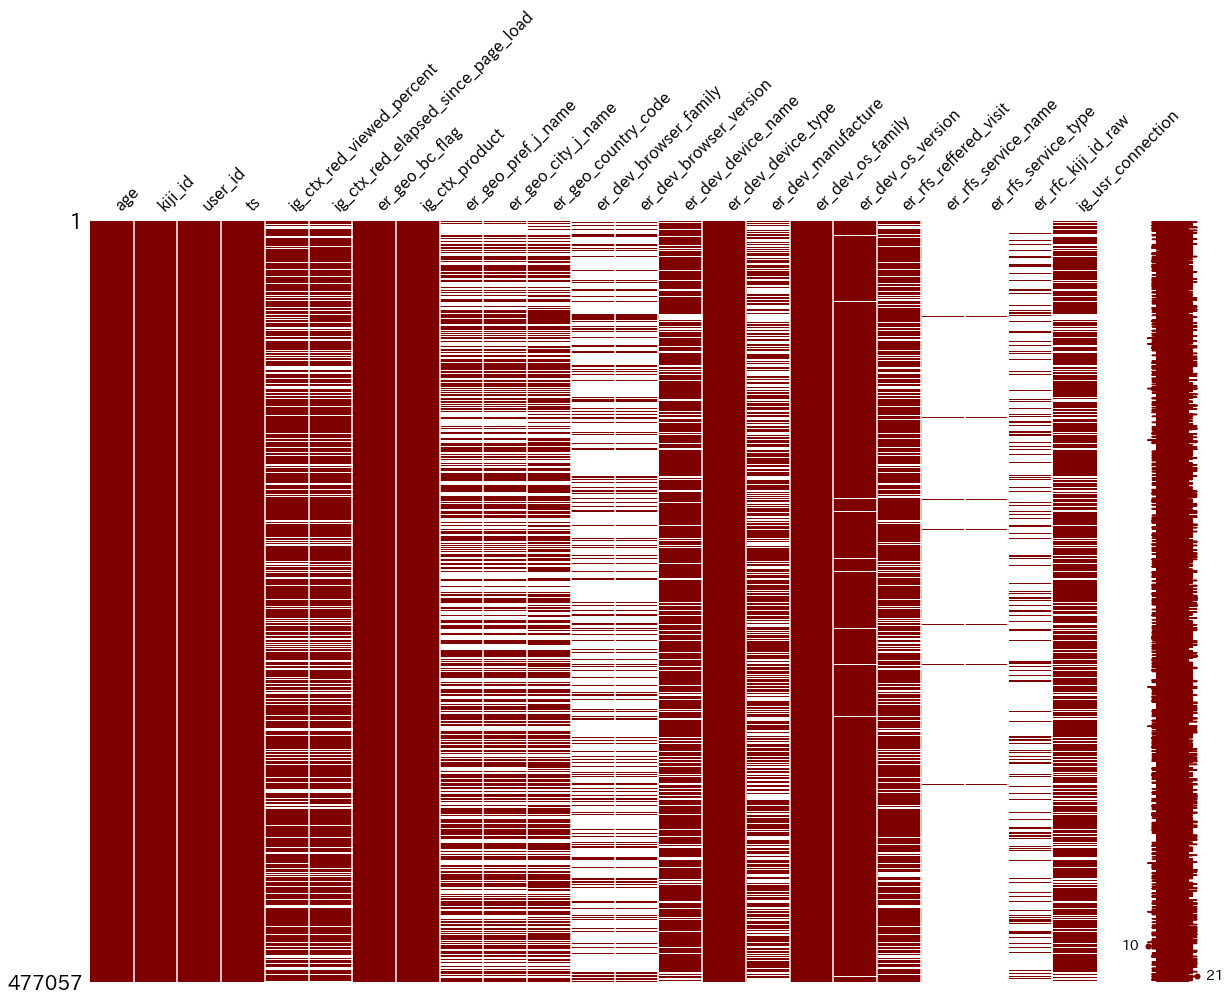

In [29]:
import missingno
missingno.matrix(train,figsize=(20,14),color=(0.5,0,0))

In [45]:
print('unique train user: ', len(train['user_id'].unique()))
print('unique test user: ', len(test['user_id'].unique()))
print('train and test no common user:', set(train['user_id'].unique()).isdisjoint(set(test['user_id'].unique())))

unique train user:  14088
unique test user:  9399
train and test no common user: True


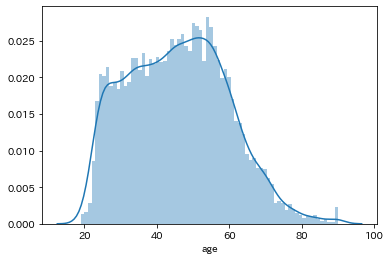

In [63]:
sns.distplot(train.drop_duplicates(subset=['user_id'])['age'], bins=72)

0         2019-10-04 06:04:56.272
1         2019-10-04 06:05:50.455
2         2019-10-04 06:07:21.177
3         2019-10-04 06:08:49.546
4         2019-10-04 06:09:08.022
                   ...           
477052    2019-10-09 04:02:16.690
477053    2019-10-09 04:05:47.224
477054    2019-10-09 04:06:16.088
477055    2019-10-09 04:08:11.239
477056    2019-10-10 20:04:23.980
Name: ts, Length: 477057, dtype: object

In [65]:
train['ts'] = pd.to_datetime(train['ts'])

In [70]:
train['ts'].dt.day

0          4
1          4
2          4
3          4
4          4
          ..
477052     9
477053     9
477054     9
477055     9
477056    10
Name: ts, Length: 477057, dtype: int64

In [73]:
kiji.isnull().sum() / len(kiji) * 100

kiji_id_raw           0.000000
display_time          0.067799
service_category      0.067799
title                 0.067799
title2               80.801537
title3               85.151983
genres                0.067799
belong_topic_info     0.067799
keywords              0.067799
body                  0.067799
moji_count            0.067799
dtype: float64

In [80]:
kiji['genres'].head(10)

0    [{'id': '7', 'name': '科学'}, {'id': '502', 'nam...
1                          [{'id': '3', 'name': '国際'}]
2                          [{'id': '4', 'name': '政治'}]
3                          [{'id': '1', 'name': '経済'}]
4                         [{'id': '8', 'name': 'くらし'}]
5    [{'id': '8', 'name': 'くらし'}, {'id': '504', 'na...
6                         [{'id': '8', 'name': 'くらし'}]
7                          [{'id': '1', 'name': '経済'}]
8                         [{'id': '8', 'name': 'くらし'}]
9                          [{'id': '1', 'name': '経済'}]
Name: genres, dtype: object

In [77]:
kiji

,kiji_id_raw,display_time,service_category,title,title2,title3,genres,belong_topic_info,keywords,body,moji_count
0,DGKDASDD200L9_20012014TJ0000,2014-01-21T03:30:00+09:00,paper,抗がん剤、低副作用競う 分子標的薬、中外など投入,遺伝子診断で適否見極め 患者負担軽く,NaN,"[{'id': '7', 'name': '科学'}, {'id': '502', 'nam...",[],"['分子標的薬', '中外製薬', 'エーザイ', 'ロシュ', '抗がん剤', 'ベーリン...","""<INSERT code=""1"" id=""DSKDZO6561128021012014TJ...",930.0
1,DGKDASDG0604D_07022013CR8000,2013-02-10T03:30:00+09:00,paper,「女性を守れ」インド席巻,女子大生性的暴行死 機に 周辺国にも波及、うねりに,NaN,"[{'id': '3', 'name': '国際'}]","[{'followable': True, 'icon': None, 'label': '...",[],"""インドで起きた女子大生暴行死事件を機に、同国内では性犯罪対策の強化や女性の権利拡大を求める...",1310.0
2,DGKDASDG19018_19122013MM0000,2013-12-19T15:30:00+09:00,paper,都知事選投開票 2月上旬が有力,NaN,NaN,"[{'id': '4', 'name': '政治'}]",[],['猪瀬直樹'],"""東京都議会議長に辞表を提出した猪瀬直樹知事は、臨時議会で議会の同意を得て、正式に失職する見...",182.0
3,DGKDASFS1600P_16102011EE8000,2011-10-17T03:30:00+09:00,paper,経常収支と財政収支とは,NaN,NaN,"[{'id': '1', 'name': '経済'}]",[],[],"""▼<FONTBOLD><TERM id=""DGXBZO0417847016032010I2...",203.0
4,DGKDZO0427272018032010BE0P00,2010-03-19T15:30:00+09:00,paper,マイレージ、マイライフ,苛酷さにじむ甘美な物語,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'label': '...","['ジェイソン・ライトマン', 'ジョージ・クルーニー', 'マイレージ', 'マイライフ']","""人呼んでリストラ宣告人。解雇通告を代行する会社の辣腕（らつわん）社員が主人公である。つらい...",783.0
...,...,...,...,...,...,...,...,...,...,...,...
26544,DGXZZO9861820018032016000000,2011-10-20T07:30:00+09:00,news,松下幸之助（4）創業時代,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', '井植歳男', '三洋電機', '検査員', '電灯会社', '昇格',...","""24歳の春、私は電灯会社の検査員に昇格した。私の昇格は異例なほど早く、この検査員は工事人仲...",1708.0
26545,DGXZZO9861825018032016000000,2011-10-24T07:30:00+09:00,news,松下幸之助（5）松下電器の運命をかける,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', 'アタチン', '松下電器産業', '吉田商店', 'プラグ', '運命']","""新しく移った大開町の家で、まず手がけたのは「アタチン」（アタッチメント・プラグ）であった。...",1667.0
26546,DGXZZO9862869018032016000000,2011-11-07T07:30:00+09:00,news,松下幸之助（8）労組の擁護運動で追放取りやめ,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['松下幸之助', '松下造船', '追放取りやめ', '星島二郎', '生産計画', '擁...","""統制時代からやがて戦時へ。次第に資材や機械がなくなってきた中で、軍の生産だけはなんとか続け...",1651.0
26547,DGXZZO9865323019032016000000,2012-01-19T07:30:00+09:00,news,松下幸之助（26）過疎地振興と万博「松下館」（上）,NaN,NaN,"[{'id': '8', 'name': 'くらし'}]","[{'followable': True, 'icon': None, 'id': '190...","['完工', '松下幸之助', '吉田五十八', '赤堀四郎', '茅誠司', '過疎地振興...","""昭和43年10月、私はたまたま四国の高知県へ行く機会があった。関西の経済界が高知県の経済人...",3520.0


In [82]:
import ast
def label_parser(data):
    return ','.join(x['label'] for x in ast.literal_eval(data))

parsed_labels = kiji['belong_topic_info'].dropna().apply(label_parser)

In [84]:
parsed_labels

0               
1        世界いまを刻む
2               
3               
4         シネマ万華鏡
          ...   
26544      松下幸之助
26545      松下幸之助
26546      松下幸之助
26547      松下幸之助
26548      松下幸之助
Name: belong_topic_info, Length: 26531, dtype: object

In [92]:
d = defaultdict(int)

for row in kiji['keywords'].dropna():
    for key in ast.literal_eval(row):
        d[key] += 1

In [94]:
train

,age,kiji_id,user_id,ts,ig_ctx_red_viewed_percent,ig_ctx_red_elapsed_since_page_load,er_geo_bc_flag,ig_ctx_product,er_geo_pref_j_name,er_geo_city_j_name,er_geo_country_code,er_dev_browser_family,er_dev_browser_version,er_dev_device_name,er_dev_device_type,er_dev_manufacture,er_dev_os_family,er_dev_os_version,er_rfs_reffered_visit,er_rfs_service_name,er_rfs_service_type,er_rfc_kiji_id_raw,ig_usr_connection
0,65.0,DGXMZO5058268004102019000000,1010270,2019-10-04 06:04:56.272,100.0000,53.119000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,NaN,LTE
1,65.0,DGXMZO5058271004102019000000,1010270,2019-10-04 06:05:50.455,100.0000,77.407000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058268004102019000000,LTE
2,65.0,DGXMZO5058239004102019000000,1010270,2019-10-04 06:07:21.177,100.0000,86.042000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058271004102019000000,LTE
3,65.0,DGXMZO5058249004102019000000,1010270,2019-10-04 06:08:49.546,49.0735,1.279000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058239004102019000000,LTE
4,65.0,DGXMZO5058255004102019000000,1010270,2019-10-04 06:09:08.022,100.0000,16.059000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058249004102019000000,LTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477052,55.0,DGXMZO5006642020092019000000,9999625300,2019-10-09 04:02:16.690,10.3807,1.829399,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477053,55.0,DGXMZO5061272004102019PE1000,9999625300,2019-10-09 04:05:47.224,28.6667,2.938872,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477054,55.0,DGXMZO5077023008102019UU8000,9999625300,2019-10-09 04:06:16.088,100.0000,65.996780,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477055,55.0,DGXLSSXK20159_08102019000000,9999625300,2019-10-09 04:08:11.239,84.8255,2.448016,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi


In [97]:
kiji.rename(columns={'kiji_id_raw':'kiji_id'}, inplace=True)

In [110]:
train_merge = pd.merge(train, kiji, on='kiji_id', how='left')
test_merge = pd.merge(test, kiji, on='kiji_id', how='left')

In [112]:
train

,age,kiji_id,user_id,ts,ig_ctx_red_viewed_percent,ig_ctx_red_elapsed_since_page_load,er_geo_bc_flag,ig_ctx_product,er_geo_pref_j_name,er_geo_city_j_name,er_geo_country_code,er_dev_browser_family,er_dev_browser_version,er_dev_device_name,er_dev_device_type,er_dev_manufacture,er_dev_os_family,er_dev_os_version,er_rfs_reffered_visit,er_rfs_service_name,er_rfs_service_type,er_rfc_kiji_id_raw,ig_usr_connection
0,65.0,DGXMZO5058268004102019000000,1010270,2019-10-04 06:04:56.272,100.0000,53.119000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,NaN,LTE
1,65.0,DGXMZO5058271004102019000000,1010270,2019-10-04 06:05:50.455,100.0000,77.407000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058268004102019000000,LTE
2,65.0,DGXMZO5058239004102019000000,1010270,2019-10-04 06:07:21.177,100.0000,86.042000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058271004102019000000,LTE
3,65.0,DGXMZO5058249004102019000000,1010270,2019-10-04 06:08:49.546,49.0735,1.279000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058239004102019000000,LTE
4,65.0,DGXMZO5058255004102019000000,1010270,2019-10-04 06:09:08.022,100.0000,16.059000,0,DS-App,NaN,NaN,NaN,NaN,NaN,SO-01H,PC,NaN,Android,7.0,True,NaN,NaN,DGXMZO5058249004102019000000,LTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477052,55.0,DGXMZO5006642020092019000000,9999625300,2019-10-09 04:02:16.690,10.3807,1.829399,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477053,55.0,DGXMZO5061272004102019PE1000,9999625300,2019-10-09 04:05:47.224,28.6667,2.938872,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477054,55.0,DGXMZO5077023008102019UU8000,9999625300,2019-10-09 04:06:16.088,100.0000,65.996780,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi
477055,55.0,DGXLSSXK20159_08102019000000,9999625300,2019-10-09 04:08:11.239,84.8255,2.448016,0,DS-App,和歌山,和歌山市,JP,NaN,NaN,iPhone,Mobile,Apple,iOS,13.1.2,True,NaN,NaN,NaN,WiFi


In [116]:
print(train['ig_ctx_product'].unique())
train['ig_ctx_product'].value_counts()

['DS-App' 'DS-Responsive' 'DS-Web-PC' 'DS-Viewer' 'DS-Web-Viewer']


DS-App           290841
DS-Viewer         74379
DS-Web-PC         72282
DS-Responsive     33747
DS-Web-Viewer      5808
Name: ig_ctx_product, dtype: int64

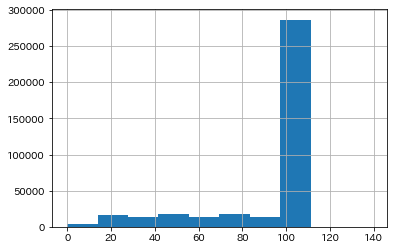

In [129]:
train['ig_ctx_red_viewed_percent'].hist(bins=10)

In [137]:
train['ig_ctx_red_elapsed_since_page_load']

0          53.119000
1          77.407000
2          86.042000
3           1.279000
4          16.059000
             ...    
477052      1.829399
477053      2.938872
477054     65.996780
477055      2.448016
477056    240.351113
Name: ig_ctx_red_elapsed_since_page_load, Length: 477057, dtype: float64

In [139]:
train['er_geo_bc_flag'].value_counts()

0    432661
1     44396
Name: er_geo_bc_flag, dtype: int64

In [141]:
train['er_geo_pref_j_name'].value_counts()

東京     177647
大阪      15798
神奈川     12680
愛知       7838
千葉       6348
兵庫       5028
埼玉       4297
福岡       3081
京都       2833
北海道      2497
静岡       1966
茨城       1900
広島       1899
長野       1248
栃木       1104
岐阜       1072
奈良       1063
群馬       1041
新潟       1018
宮城       1002
三重        936
岡山        918
滋賀        837
石川        783
愛媛        571
和歌山       533
富山        509
熊本        507
沖縄        486
福島        474
鹿児島       467
大分        457
長崎        447
岩手        400
香川        360
高知        311
宮崎        310
秋田        303
青森        302
山梨        296
山形        281
福井        278
徳島        269
山口        269
鳥取        208
島根         96
佐賀         71
Name: er_geo_pref_j_name, dtype: int64

In [145]:
train['er_geo_country_code'].value_counts()

JP    263039
US      5876
SG      2311
TH      1556
GB      1126
       ...  
PE         5
SX         4
CW         3
BG         1
AT         1
Name: er_geo_country_code, Length: 69, dtype: int64

In [147]:
train['er_geo_country_code'].isnull().sum()

193133

In [151]:
print(train['er_dev_browser_family'].isnull().sum())
train['er_dev_browser_family'].value_counts()

366079


Chrome        41402
IE            28921
Safari        26474
Edge           9172
Firefox        4579
Eight           246
Sleipnir        137
Vivaldi          40
BlackBerry        7
Name: er_dev_browser_family, dtype: int64

In [153]:
train['er_dev_browser_version'].value_counts()

11               28857
77.0.3865.90     26487
12.1.2           12241
77.0.3865.92      6414
13.0.1            6106
                 ...  
71.0.3578.89         1
53.0.2785.124        1
10.0.3               1
72.0.3626.101        1
75.0.3770.89         1
Name: er_dev_browser_version, Length: 169, dtype: int64

In [3]:
train.groupby('user_id')['']

array([   1010270,    1844640,    1886080, ..., 9997808490, 9998489870,
       9999625300])

In [ ]:
train

In [ ]:
train.dtyeps()